# Data Science job salaries 

Dataset from [Kaggle](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries).

Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

Read data

In [2]:
df = pd.read_csv('ds_salaries.csv')

How many columns are there? What are their names? What kind of data to they have?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Get a closer look of the data


In [4]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


**What are the salaries by year? Has it increased or decreased over the years?**

Let's first look at which years are included in the data, and how many observations per year we have.

In [5]:
df.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

What is the average salary per year?

In [6]:
year = df.groupby('work_year').mean('salary_in_usd')
year

,Unnamed: 0,salary,salary_in_usd,remote_ratio
work_year,,,,
2020,35.5,382386.236111,95813.000000,64.583333
2021,180.0,546677.387097,99853.792627,69.124424
2022,447.5,158827.786164,124522.006289,73.584906


What is the average salary per experience level?

In [6]:
df['experience_level'] = df['experience_level'].replace({'EN':'Junior',
                                                        'MI': 'Midlevel',
                                                        'SE':'Senior',
                                                        'EX': 'Expert'})
categories=pd.CategoricalDtype(categories=['Junior', 'Midlevel', 'Senior', 'Expert'], 
                           ordered=True)
df['experience_level']=df["experience_level"].astype(categories)

                                                            

In [9]:
experience = df.groupby('experience_level').mean('salary_in_usd').round(0).sort_values('salary_in_usd')
experience

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
experience_level,,,,,
Junior,218.0,2021.0,264622.0,61643.0,70.0
Midlevel,270.0,2021.0,480618.0,87996.0,64.0
Senior,359.0,2022.0,213949.0,138617.0,76.0
Expert,258.0,2021.0,427072.0,199392.0,79.0


Average salary over the last three years by level of experience

[Text(0.5, 1.0, 'DS salaries over the years'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Salary in USD')]

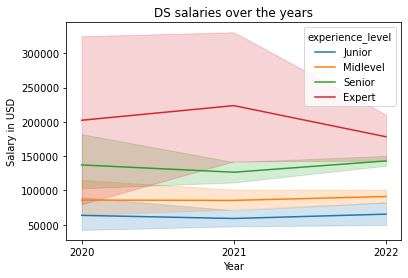

In [9]:
df['work_year'] = df['work_year'].apply(str)
sns.lineplot(x="work_year", y="salary_in_usd",
            hue = 'experience_level',
            data=df).set(title='DS salaries over the years',
                          xlabel = 'Year', ylabel = 'Salary in USD')


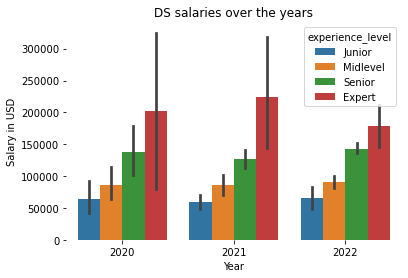

In [10]:
sns.barplot(x="work_year", y="salary_in_usd",
            hue = 'experience_level',
             data=df).set(title='DS salaries over the years',
                          xlabel = 'Year', ylabel = 'Salary in USD')
for spine in plt.gca().spines.values():
    spine.set_visible(False)


Does company size matter for salaries? Perhaps bigger companies can afford higher salaries?



In [11]:
df['company_size']=df["company_size"].replace({'S': 'Small',
                                                'M': 'Medium',
                                                'L': 'Large'})
experience_by_size = df.groupby(['company_size', 'experience_level']).size().reset_index()
experience_by_size


,company_size,experience_level,0
0,Large,Junior,29
1,Large,Midlevel,86
2,Large,Senior,72
3,Large,Expert,11
4,Medium,Junior,30
5,Medium,Midlevel,98
6,Medium,Senior,186
7,Medium,Expert,12
8,Small,Junior,29
9,Small,Midlevel,29


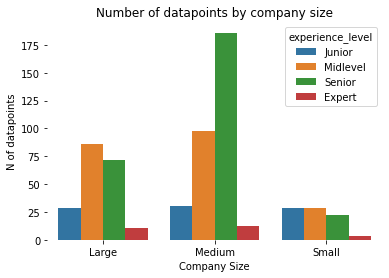

In [13]:
sns.barplot(x="company_size", y=0,
            hue = 'experience_level',
             data=experience_by_size).set(title='Number of datapoints by company size',
                          xlabel = 'Company Size', ylabel = 'N of datapoints')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

In [14]:
company_size = df['company_size'].replace({"Large":3, "Medium": 2, "Small": 1})
salary = df['salary_in_usd']
stats.pearsonr(company_size,salary)

(0.15120545454530898, 0.00018464701639251776)

There's a significant low correlation (larger companies pay better salaries).

Average salary per company size

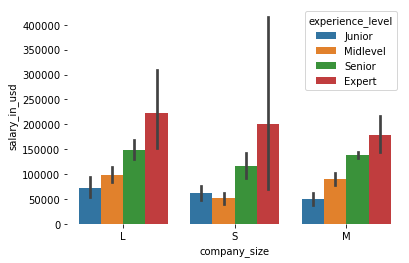

In [15]:
sns.barplot(x = 'company_size',
          y = 'salary_in_usd',
            hue = 'experience_level',
            data = df)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

Looks like there is a lot of variation of salaries within the expert level in small companies. Let's investigate that.

In [11]:
df


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Midlevel,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,Senior,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,Senior,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,Midlevel,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,Senior,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,Senior,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,Senior,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,Senior,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,Senior,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [13]:
expert_small = df[(df.experience_level == 'Expert') &
                 (df.company_size == 'S')]

In [14]:
expert_small

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
187,187,2021,Expert,FT,Data Science Consultant,59000,EUR,69741,FR,100,ES,S
225,225,2021,Expert,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
375,375,2022,Expert,FT,Lead Data Engineer,150000,CAD,118187,CA,100,CA,S


Well, we simply do not have enough data to say that when you are an expert it does not matter the company size. So, we keep our understanding that bigger salaries are found in bigger companies.